## Do females Nobel Prize winners tend to be younger than males?
### The story: 
The movitation of this excercise comes from a statement I hear. I hear someone say that they 'have the impression' that females tend to win Nobel Prizes at relatively younger ages than males. Then they went on to list a few young (<60 yrs old) female winners of recent years (google Malala Yousafzai, and the 2020 prize for physics and chemistry) as evidence.  Is their 'impression' true?  

Before we take sides on answers, be aware that **our brain is not a perfect neural network**. It can suffer from high bias (pre-assumptions; models too simple) and high variance (overthinking; models too complicated). There is an essential step in building any machine learning model called 'cross-validation'. A machine learning model (e.g., a neural network) built from a training set must be tuned and validated on the 'cross-validation' dataset before making predictions on the test and new datasets. *This validation step achors the neural network to the ground truth so that the model has minimal bias and variance*. For those who want to know more about the fundamentals of cross-validation in machine learning, I refer to week 6 of Andrew Ng's ML course.

**Do we have a validation step when we use our brain?**  It certainly isn't mandatory, otherwise we would not live in a world full of bias and depair. Using our brain without doing a validation step is scary. If we have a bias on something, increasing the training data (aka life experience) would not help us come back to the truth (e.g., racism). On the other hand, if we overthink something, our model would seem to fit a specific ocasion but fail to reflect the actual situation (e.g., over-reacting). Excitingly or scarily, this is likely where machine learning and AI would outperform human beings, because the mandatory validation step would get them closer to the truth of the universe... muhahaha.

Alas, I digress. This note is not about neural network or machine learning. It is about showing an example of doing a cross-validation step before we jump to conclusions. Sometimes the cross-validation hard because it is hard to get the cross-validation data, but most times, it is easy (like this exercise!).   



### Dataset: 
I compile a dataset for all Nobel Prize winners from 1901 to 2020. The data for 1901-2016 are collected from a project in the Datacamp and the data for 2017-2020 are taken from the Nobel prize website (www.nobelprize.org).
Like most data science related projects, compiling and cleaning the data takes up more than half the total time of a project. I have cleaned the tables using pandas and would not bore you with the non-trivial trivials. The data is now in a clean csv file format. 

### Load the data:

In [ ]:
'''
 Analysing the dataset of Nobel Prize winners from 1901-2020.
 Plotting the number of Nobel Prize Winners as a function time with age and gender. 
'''
import glob
import pandas as pd

csvfile = glob.glob('./**/nobel_1901_2020.csv', recursive = False)
filename = csvfile[0]

df = pd.read_csv(filename)
print(type(df))  # making sure the DataFrame is properly loaded.
print('rows and columns ', df.shape)  # checking the dimension.
df.head() # checking the first few rows.

### Data visualisation
Plot all winners with two genders as a function of the award year on the same plot.

In [ ]:
# Uncomment the line below to make plot interative.
# %matplotlib widget   

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# add a new column to store the 'age' of winners in the dataframe. 
df['age'] = df['year'] - df['birth_year']

# customised seaborn setting
sns.set()
sns.set_palette('colorblind')
sns.set_style('ticks')
sns.set_context('talk')

g = sns.lmplot(x = 'year', y='age', data = df, 
               hue = 'gender',
               lowess = False, 
               aspect = 1.8, 
               markers = ['.', 'D'],
               scatter_kws = {'alpha':0.7,'s':50}, 
               line_kws = {'alpha':1}, 
               ci = 95,
               )
g.set(ylim = (0, 100), xlim = (1900, 2025))
plt.show()


<!-- 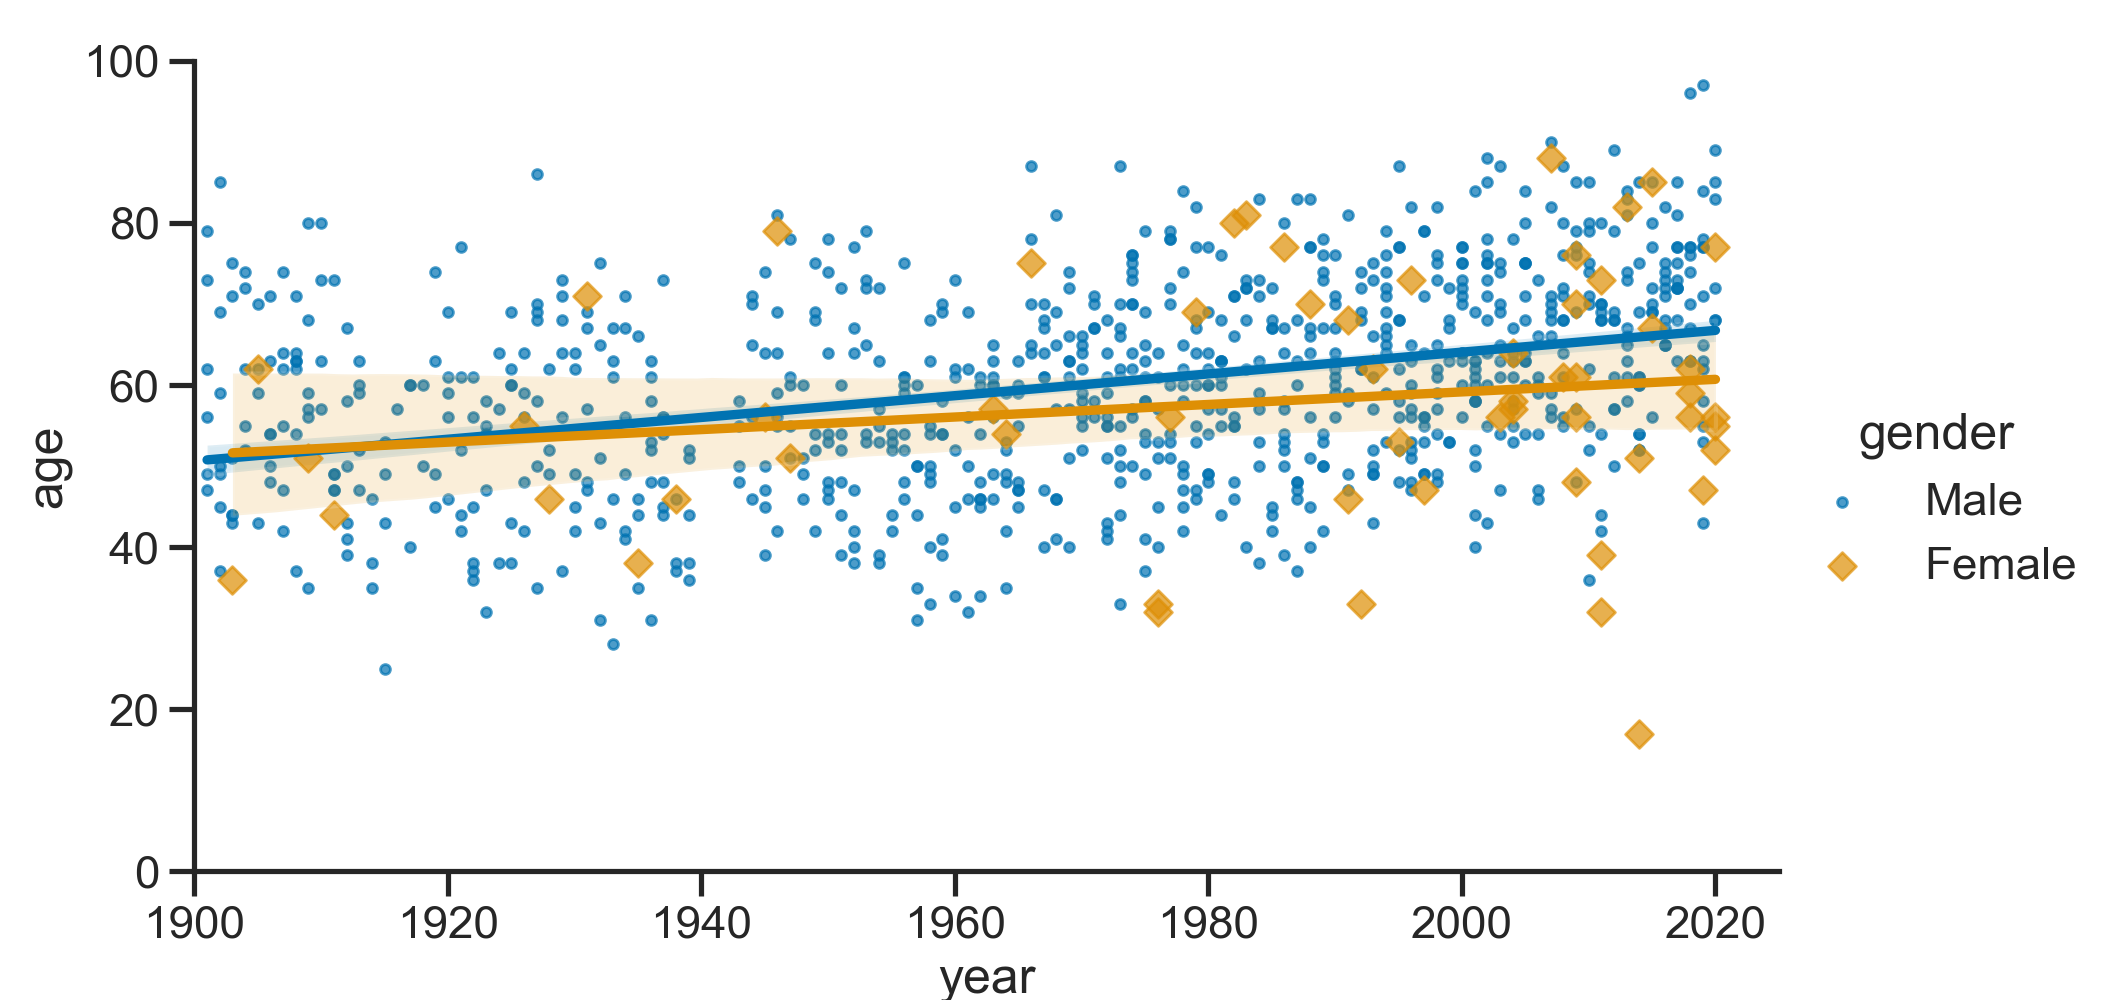 -->
<div>
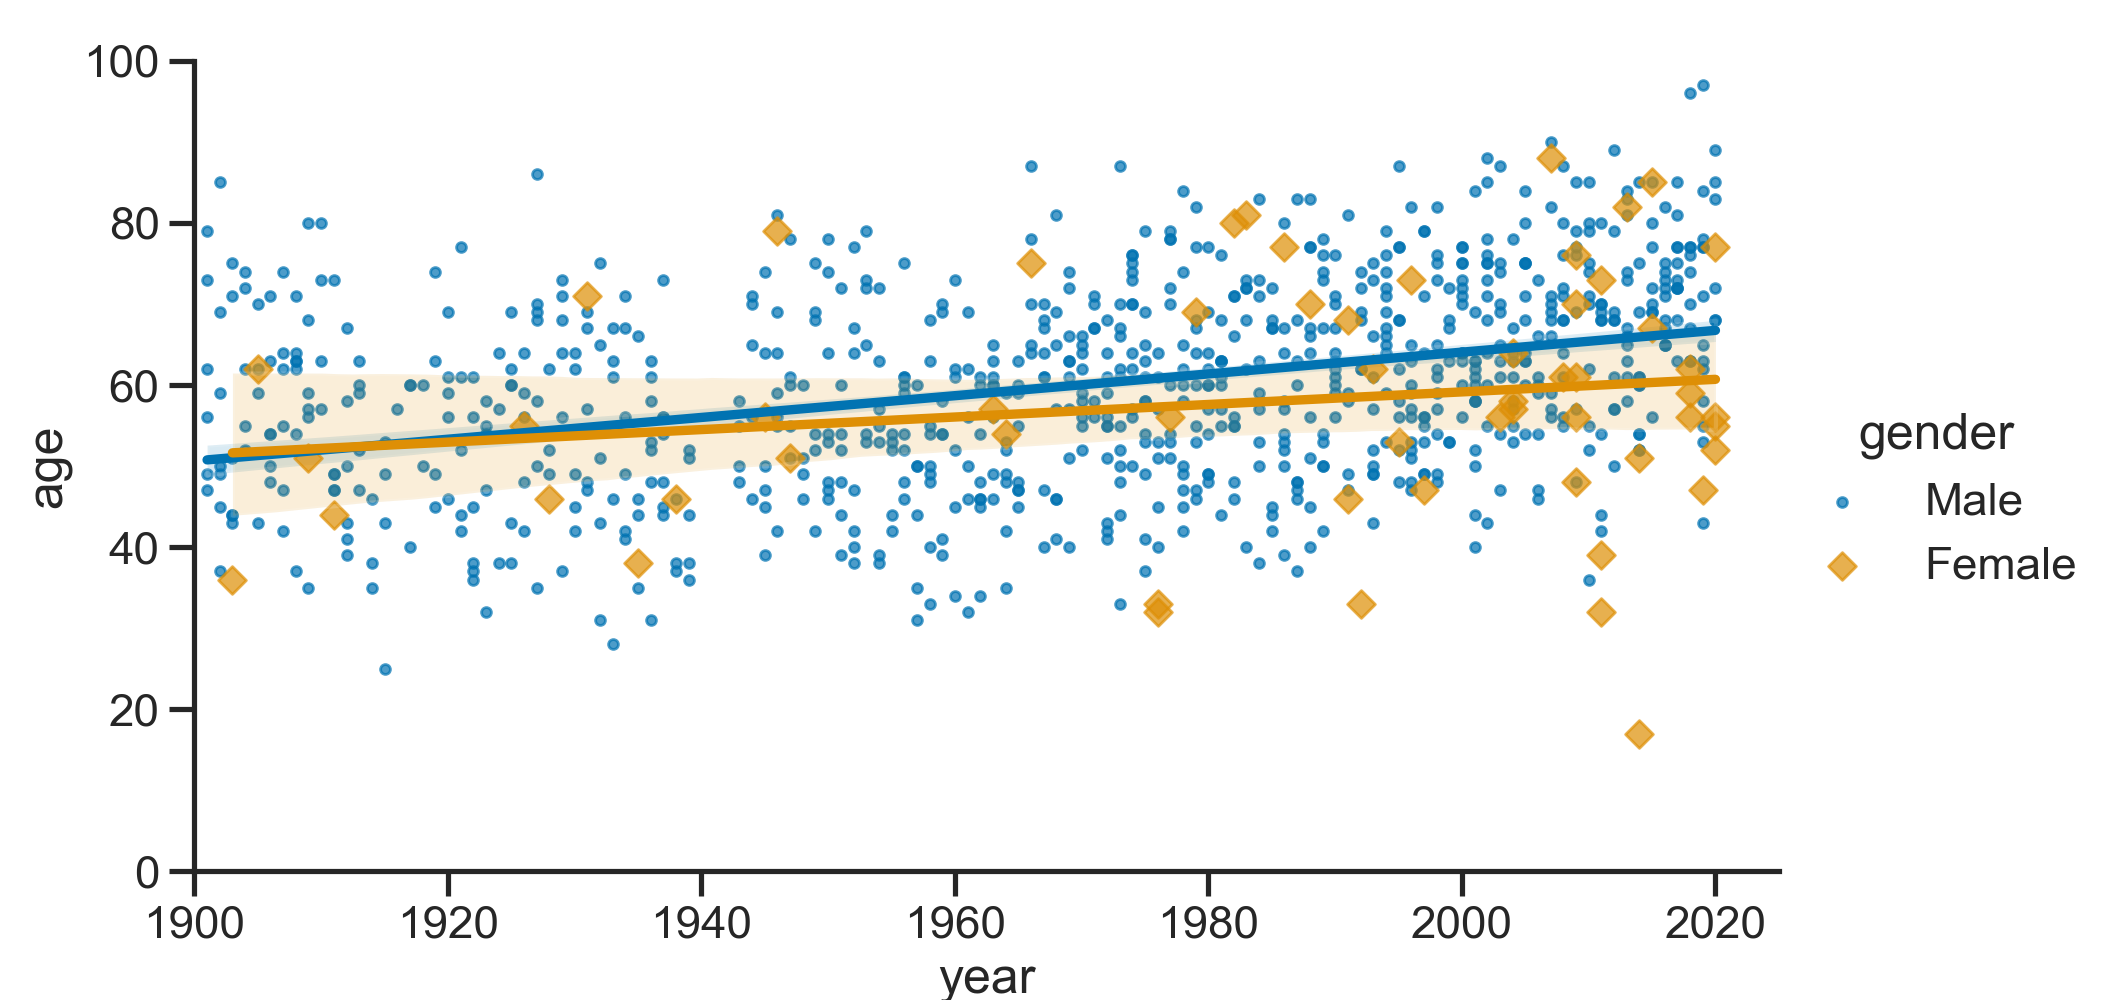
</div>

This plot (Figure 1) already tells a lot!  A few take-way points:
* There is a correlation between the x (year) and y (age) variables.  **The average age of Nobel Prize Winners has increased from about 45 yrs old to slight above 60.**
* The data are dominated by males.  We will calculate the fraction of female/male ratio in the next chunk of code.
* The female datapoints are subject to small number statistics. We will dig deeper into this below.
* The lmplot plots the linear regression of the x (year) and y (age) variables for both the male and the female groups. The 95% confidence levels of the linear regressions are drawn as translucent shades.  We will get the Pearson r and p values for the linear regressions in the next chunk.
<!-- * The average age difference between the Male and Female groups gets larger with time, though this difference is not statistically significant for the two groups. See below.  -->
* The shaded area (95% confidence levels) of the blue (Male) and organe (Female) groups overlap, meaning that **the age difference between the Male and Female groups is not significant at the 95% confidence level.** We will dig deeper on this conclusion in the next chunk. 


In [ ]:
num_male = df[df['gender'] == 'Male']['gender'].value_counts()
num_female = df[df['gender'] == 'Female']['gender'].value_counts()
frac = np.round(num_female.iloc[0]/(num_male.iloc[0] + num_female.iloc[0]), 3)
print(f'Total fraction of female winners {frac}')

df['female_winner'] = df['gender'] == 'Female'
female_winners = df.groupby(by=['category'], as_index=False)['female_winner'].mean()
print(female_winners)

In [ ]:
g = sns.lmplot(x = 'year', y='age', data = df, 
               hue = 'gender',
               lowess = False, 
               aspect = 1.8, 
               markers = ['o', 'D'],
               scatter_kws = {'alpha':0.5,'s':50}, 
               line_kws = {'alpha':1}, 
               ci = 95,
               x_bins = 8,
               )
g.set(ylim = (0, 100), xlim = (1900, 2025))

from scipy.stats import pearsonr
x = df['year']
y = df['age']
nas = np.logical_or(x.isnull(), y.isnull())
corr = pearsonr(x[~nas], y[~nas])
corr = [np.round(c, 3) for c in corr]
print('The Pearson coeffients r and p are: ', corr)
print('A small p(<0.05) means the null hypothesis that there is no correlation between x and y is rejected.')
text_all = 'r=%s, p=%s' % (corr[0], corr[1])
text_gender = f'f_female = {frac*100}%' 

ax = g.axes[0,0]
ax.text(1902, 90, text_all, fontsize=15)
ax.text(1902, 82, text_gender, fontsize=15)
plt.show()

Overlay the 'The Pearson coeffients r and p on the plot.  Bin the data in the x-direction to highlight the relation between age and award year.  The fraction of women who have won a Nobel Prize over the past 120 years is only 6%.
<!-- 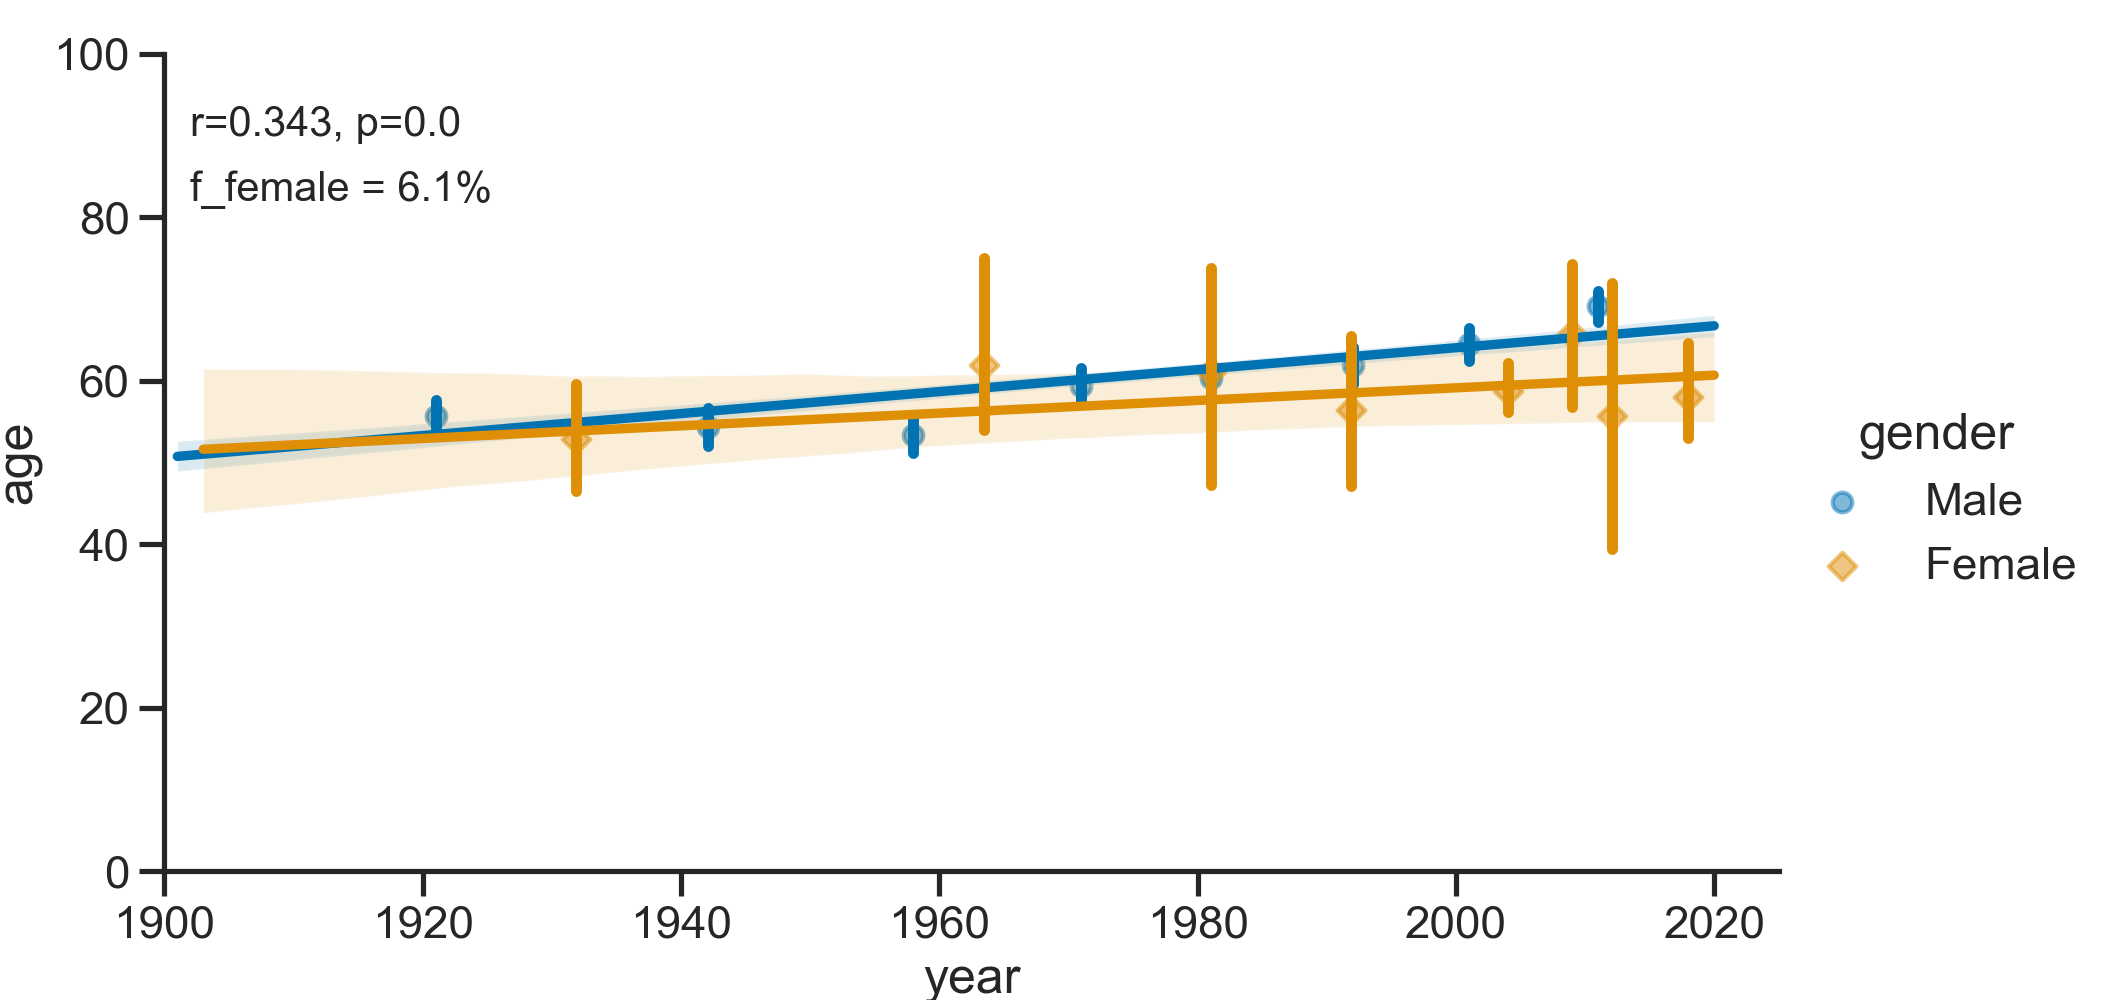 -->
<div>
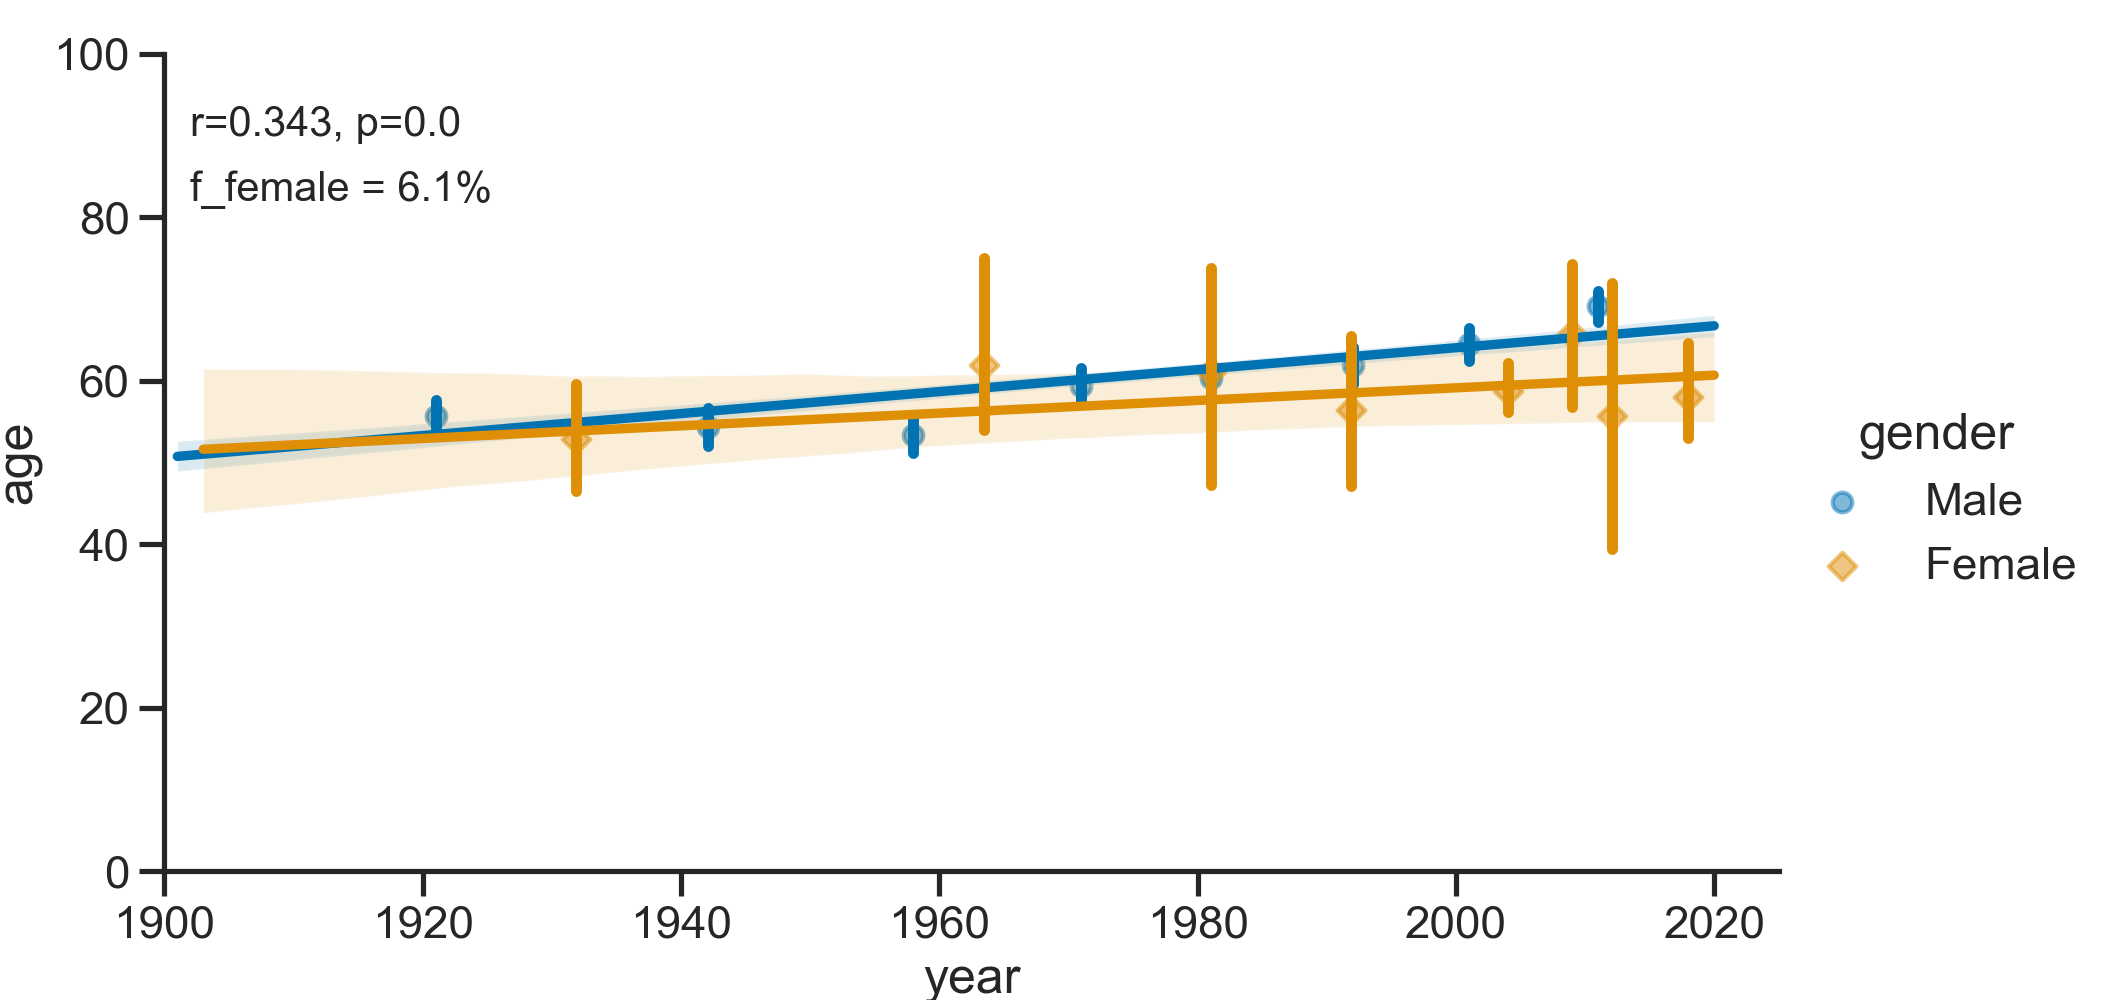
</div>


In [ ]:
# customised seaborn setting
sns.set()
sns.set_palette('colorblind')
sns.set_style('ticks')
sns.set_context('poster')

cat_order = ['Chemistry', 'Medicine', 'Physics', 'Economics', 'Literature', 'Peace']

g = sns.lmplot(x = 'year', y='age', data = df, 
               hue = 'gender',
               col = 'category', 
               col_wrap = 3, 
               col_order = cat_order,
               ci = 95, 
               lowess = False, 
               aspect = 1.2, 
               markers = ['.', 'D'],
               scatter_kws = {'alpha':0.8,'s':100}, 
               legend_out= False, 
               sharex = True, sharey = True)

g.set(ylim = (0, 100), xlim = (1900, 2025))
g.fig.suptitle('Nobel Prize winners by gender and field', y = 1.03)


for panel, cat_name in enumerate(cat_order):
    frac_cat = female_winners[female_winners['category'] == cat_name]['female_winner'].values
    frac_cat = np.round(frac_cat * 100, 1)
    sfrac_cat = 'f_female: ' + str(frac_cat[0]) + '%'
    ax = g.axes[panel]
    ax.text(1905, 10, sfrac_cat, fontsize = 18, color = 'black')

ax = g.axes[5]
text = "'Malala Yousafzai'<--"
ax.text(1966, 15, text, fontsize = 15, color = 'black')

plt.show()

Divide the plot by categories.  The STEM fields are top row.

<!-- 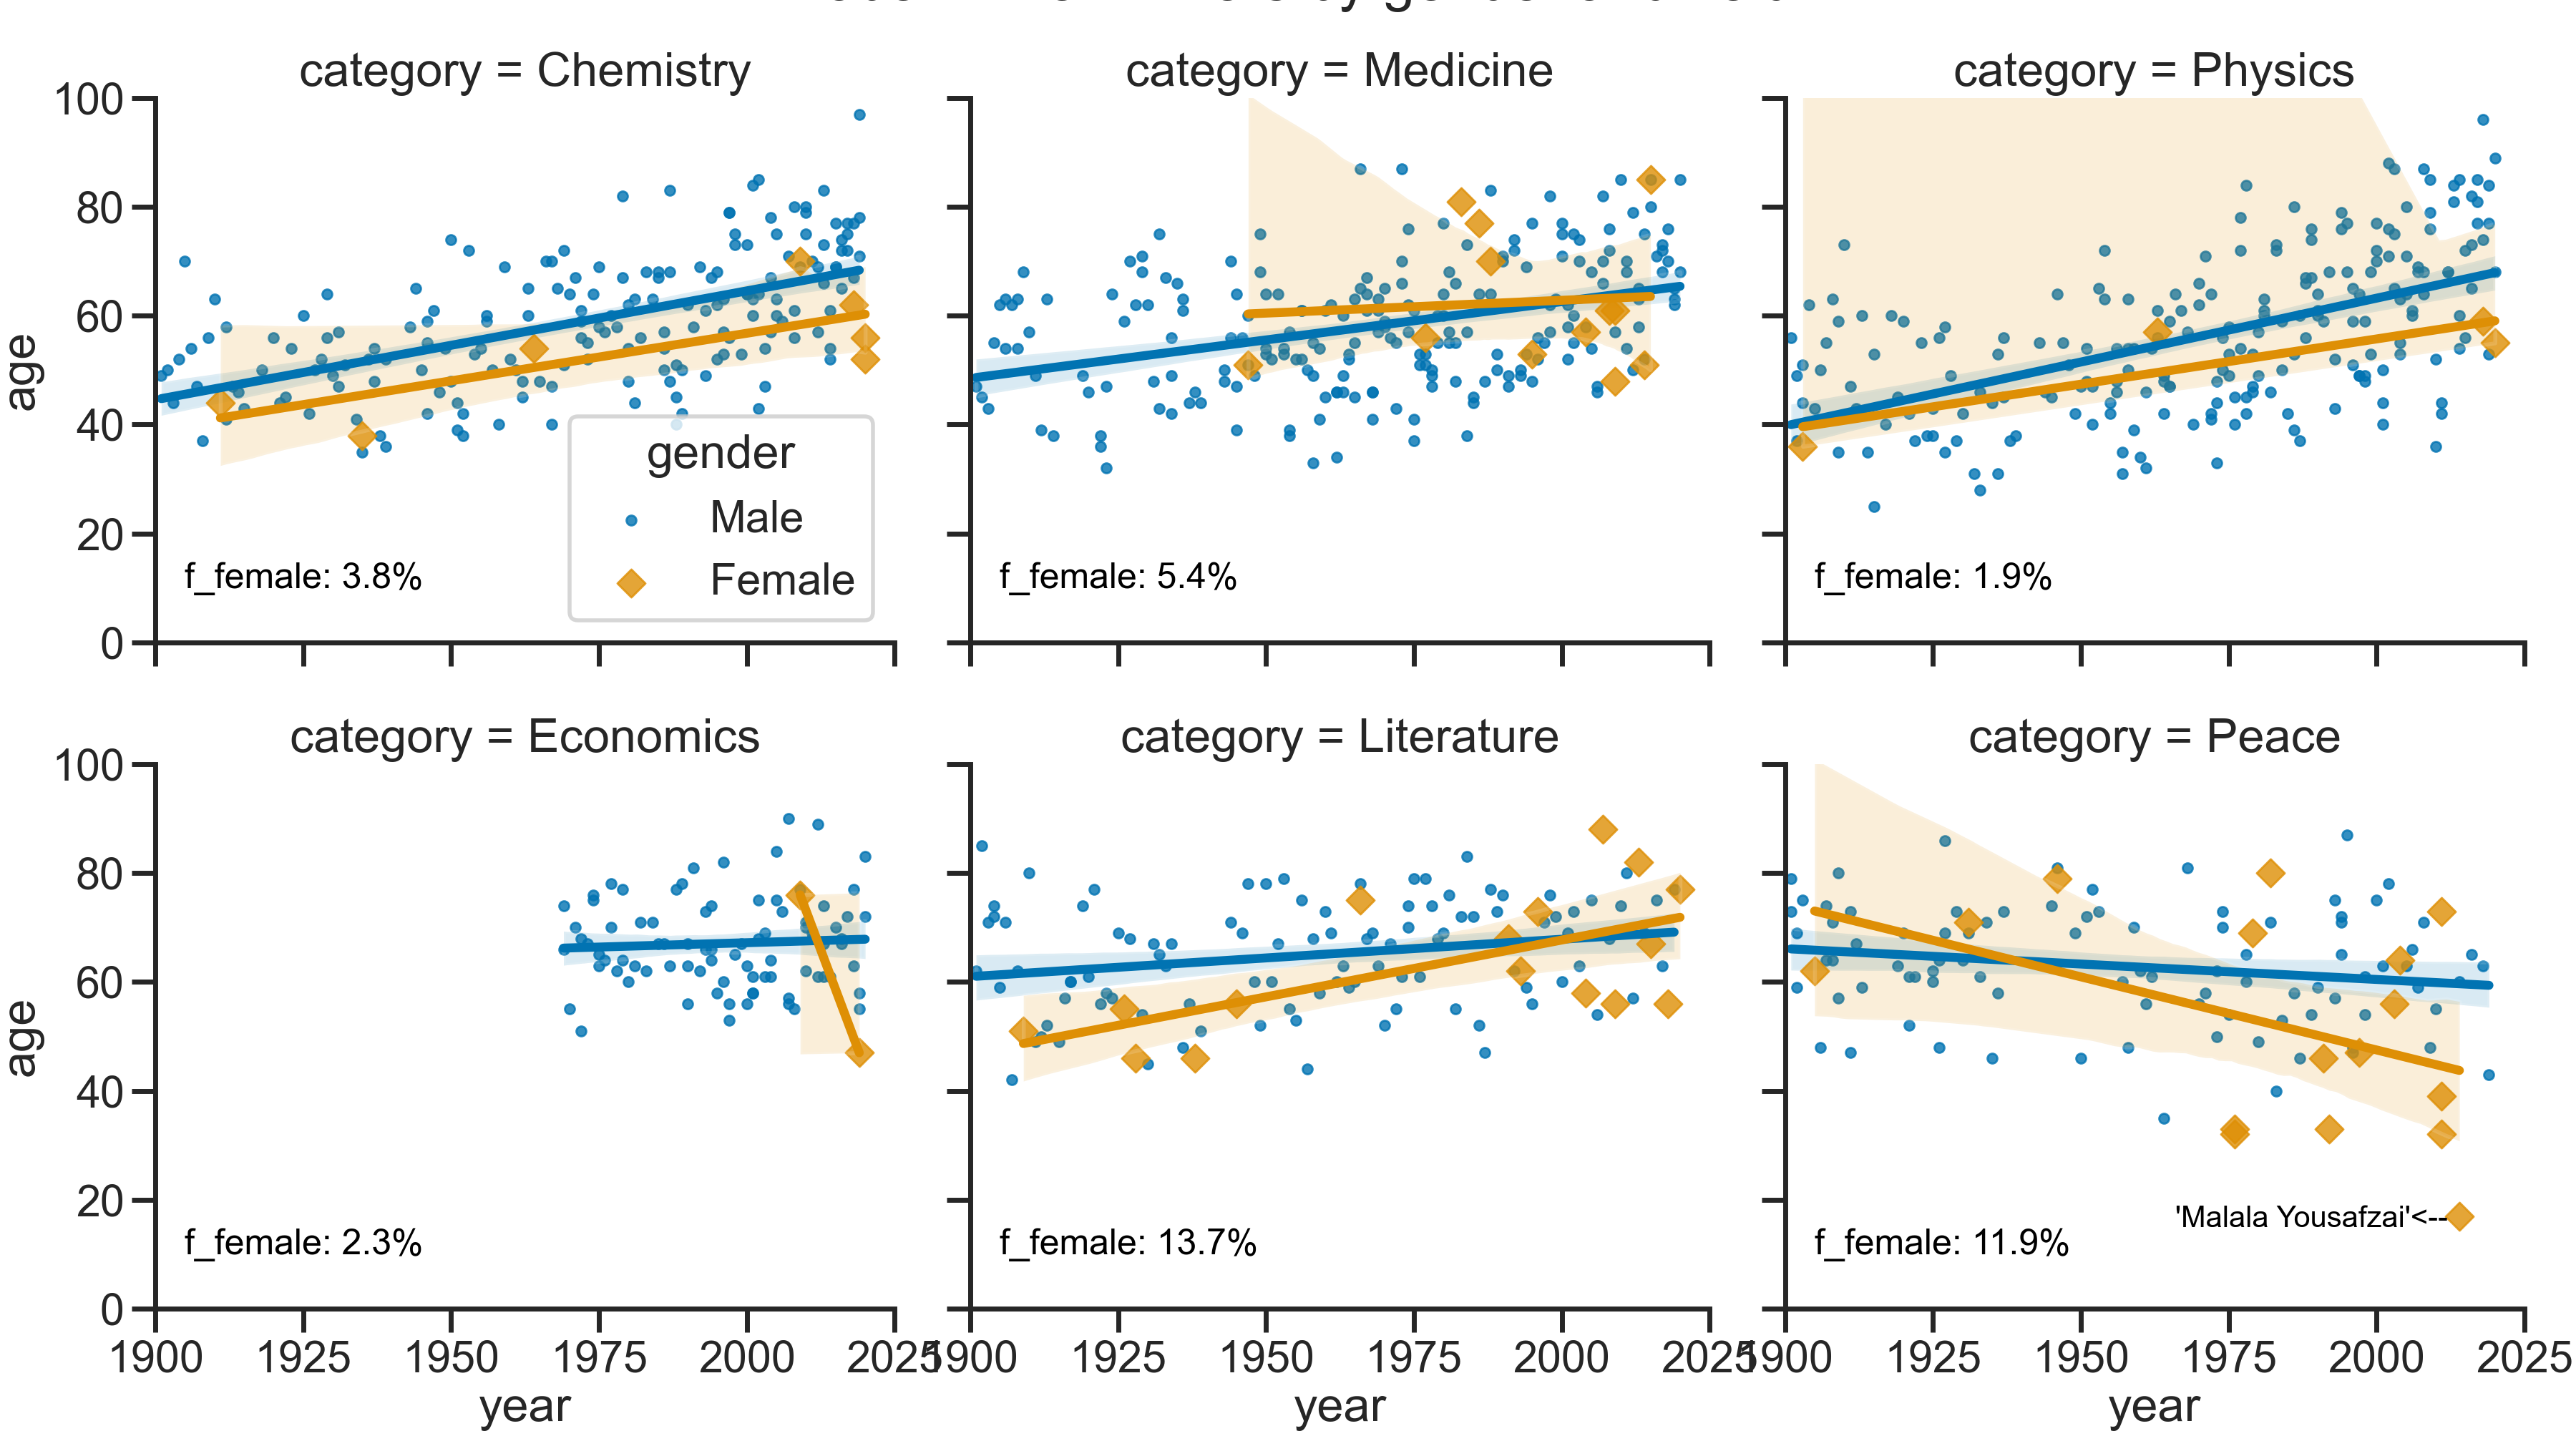 -->

<div>
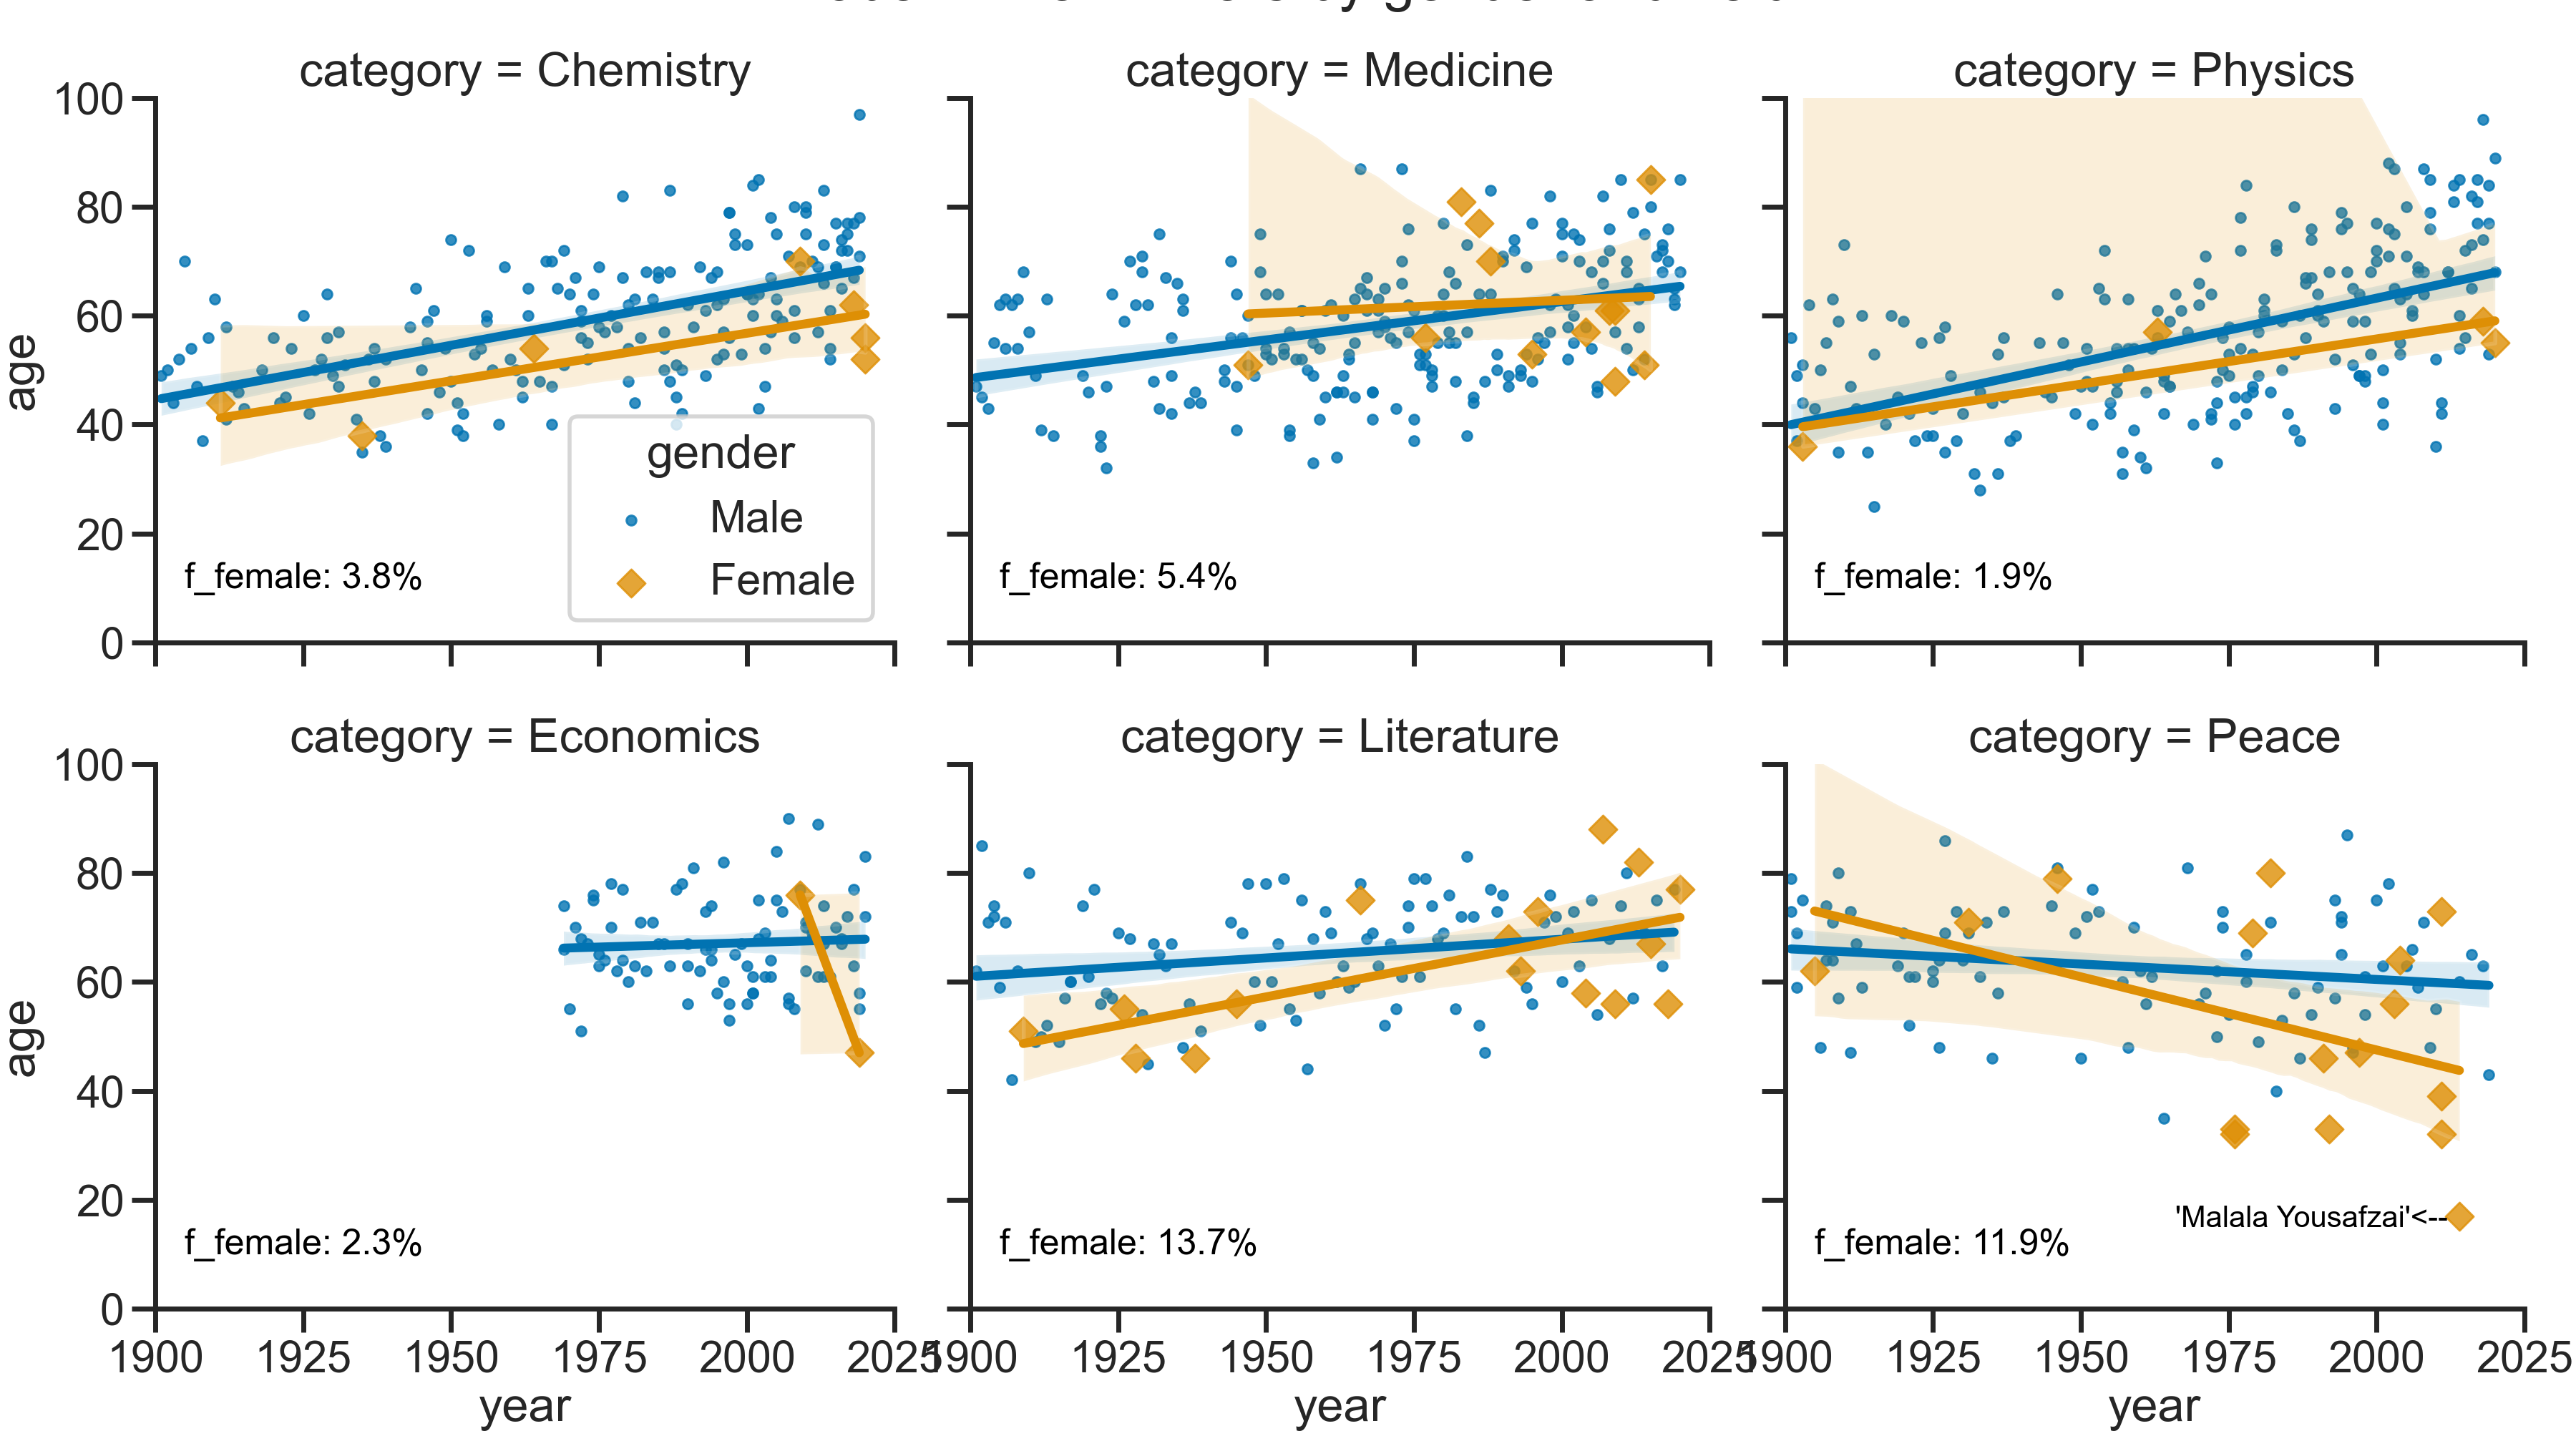
</div>


### Conclusion

Overall:  There is no statistical age difference between the female and male winner groups at a 95% confidence level.   

Take-way: 
* There is no statistical age difference between the female and male winner groups across each prize category.
* The number of female winners is TOO small in STEM fields ('Chemistry', 'Medicine', 'Physics', 'Economics'), leading to large statistical scatter.  Notably, **Physics has the lowest fraction of women (4 women vs 210 men)** and Economics has the lowest absolute number of women (2 women vs 87 men). 
* The average age of winners increases with time for most catagories except for the 'Nobel Prize for Peace'. The youngest winner is a female, 'Malala Yousafzai', who won the Nobel Prize for Peace at the age of 17.
